
# Install and import



In [1]:
!sudo apt install libsox-dev
!pip install torchaudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libopencore-amrnb0 libopencore-amrwb0
  libsox-fmt-all libsox-fmt-alsa libsox-fmt-ao libsox-fmt-base libsox-fmt-mp3
  libsox-fmt-oss libsox-fmt-pulse libsox3 libwavpack1
Suggested packages:
  libaudio2 libsndio6.1
The following NEW packages will be installed:
  libao-common libao4 libid3tag0 libmad0 libopencore-amrnb0 libopencore-amrwb0
  libsox-dev libsox-fmt-all libsox-fmt-alsa libsox-fmt-ao libsox-fmt-base
  libsox-fmt-mp3 libsox-fmt-oss libsox-fmt-pulse libsox3 libwavpack1
0 upgraded, 16 newly installed, 0 to remove and 30 not upgraded.
Need to get 1,053 kB of archives.
After this operation, 4,061 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libao-common all 1.2.2+20180113-1.1ubuntu3 [6,568 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main

In [2]:
!pip install sox

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [22]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchaudio.__version__)

2.1.0+cu121
2.1.0+cu121


In [4]:
import math

from IPython.display import Audio
import matplotlib.pyplot as plt

from torchaudio.utils import download_asset
#test samples from pytorch
SAMPLE_WAV = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.wav")
SAMPLE_RIR = download_asset("tutorial-assets/Lab41-SRI-VOiCES-rm1-impulse-mc01-stu-clo-8000hz.wav")
SAMPLE_SPEECH = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")
SAMPLE_NOISE = download_asset("tutorial-assets/Lab41-SRI-VOiCES-rm1-babb-mc01-stu-clo-8000hz.wav")

100%|██████████| 427k/427k [00:00<00:00, 3.05MB/s]
100%|██████████| 31.3k/31.3k [00:00<00:00, 1.19MB/s]
100%|██████████| 53.2k/53.2k [00:00<00:00, 2.22MB/s]
100%|██████████| 78.2k/78.2k [00:00<00:00, 2.77MB/s]


# Load Data

In [5]:
waveform1, sample_rate1 = torchaudio.load(SAMPLE_WAV)

# Define Effect


In [15]:
# Define effects
effects = [
    ["lowpass", "-1", "300"],  # apply single-pole lowpass filter
    ["speed", "1.2"],  # reduce the speed
    # This only changes sample rate, so it is necessary to
    # add `rate` effect with original sample rate after this.
    ["rate", f"{sample_rate1}"],
    ["reverb", "-w"],  # Reverbration gives some dramatic feeling
]


# Apply Effect

In [16]:
# Apply effects
waveform2, sample_rate2 = torchaudio.sox_effects.apply_effects_tensor(waveform1, sample_rate1, effects)

print(waveform1.shape, sample_rate1)
print(waveform2.shape, sample_rate2)

torch.Size([2, 109368]) 44100
torch.Size([2, 91140]) 44100


In [13]:
from IPython.display import Audio

# Assuming SAMPLE_WAV is your original audio waveform
Audio(waveform1[0].numpy(), rate=sample_rate1)

In [17]:
from IPython.display import Audio

# Assuming SAMPLE_WAV is your original audio waveform
Audio(waveform2[0].numpy(), rate=sample_rate2)

In [31]:
def speedControllFilter(wav_file, rate , speed):
  effects = [
    ["lowpass", "-1", "300"],
    ["speed", str(speed)],
    ["rate", f"{sample_rate1}"],
    ["reverb", "-w"],
  ]

  new_wav , new_rate = torchaudio.sox_effects.apply_effects_tensor(wav_file, rate, effects)
  return new_wav,new_rate


In [35]:
waveform2 , rate = speedControllFilter(waveform1 , sample_rate1 , 2)
Audio(waveform2[0].numpy(), rate=rate)


In [41]:
def addNoise(wav_file , snr):
  noise = torch.randn_like(wav_file)
  signal_power = wav_file.pow(2).sum() / wav_file.numel()
  noise_power = noise.pow(2).sum() / noise.numel()
  scaling_factor = (signal_power / noise_power).sqrt() * 10**(-snr / 20.0)
  noisy_waveform = wav_file + scaling_factor * noise
  return noisy_waveform


def plot_orignalAndNew (old_Wav , new_Wav):
  plt.figure(figsize=(12, 4))
  plt.subplot(2, 1, 1)
  plt.plot(old_Wav[0].numpy())
  plt.title('Original Audio')

  plt.subplot(2, 1, 2)
  plt.plot(new_Wav[0].numpy())
  plt.title('New Audio')

  plt.tight_layout()
  plt.show()

def plot_spectogramme (waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)
    plt.show(block=False)

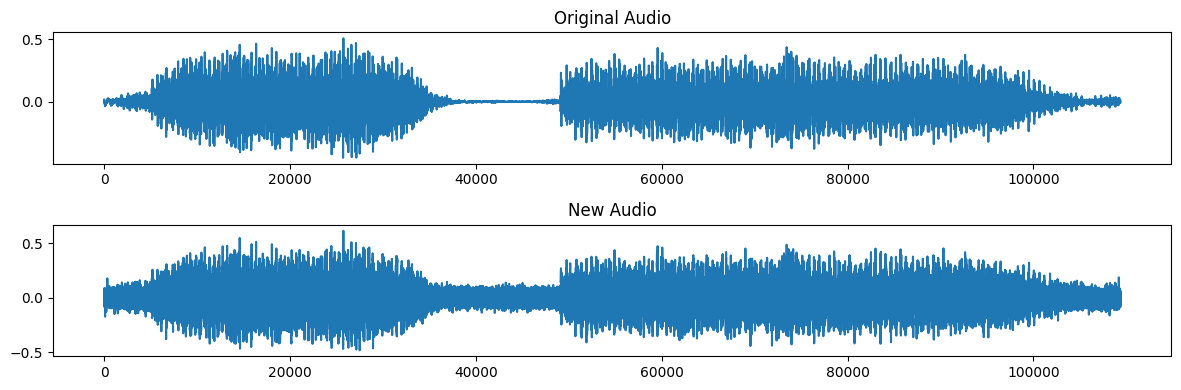

In [24]:
noisy = addNoise(waveform1,10)
plot_orignalAndNew(waveform1,noisy)

In [25]:
Audio(noisy[0].numpy(), rate=sample_rate1)

In [30]:
wav_speech , speech_rate = torchaudio.load(SAMPLE_SPEECH)

Audio(wav_speech[0].numpy(), rate= speech_rate)

In [34]:
speechx2 , ratex2 = speedControllFilter(wav_speech,speech_rate , 1.1)
Audio(speechx2[0].numpy(), rate=ratex2)

In [36]:
def combinedSpeedAndNoise (wav_file, rate , speed , snr ):
  effects = [
    ["lowpass", "-1", "300"],
    ["speed", str(speed)],
    ["rate", f"{sample_rate1}"],
    ["reverb", "-w"],
  ]

  new_wav , new_rate = torchaudio.sox_effects.apply_effects_tensor(wav_file, rate, effects)
  noise = torch.randn_like(new_wav)
  signal_power = new_wav.pow(2).sum() / new_wav.numel()
  noise_power = noise.pow(2).sum() / noise.numel()
  scaling_factor = (signal_power / noise_power).sqrt() * 10**(-snr / 20.0)
  noisy_waveform = new_wav + scaling_factor * noise
  return noisy_waveform , new_rate


In [40]:
speechx2 , ratex2 = combinedSpeedAndNoise(wav_speech,speech_rate ,0.8,20)
Audio(speechx2[0].numpy(), rate=ratex2)

In [46]:
def AmplifyAudio(wavForm , level):
  amplified_waveform = torchaudio.transforms.Vol(level)(wavForm)
  return amplified_waveform

Audio(AmplifyAudio(speechx2 , 3.0)[0].numpy(), rate=ratex2)